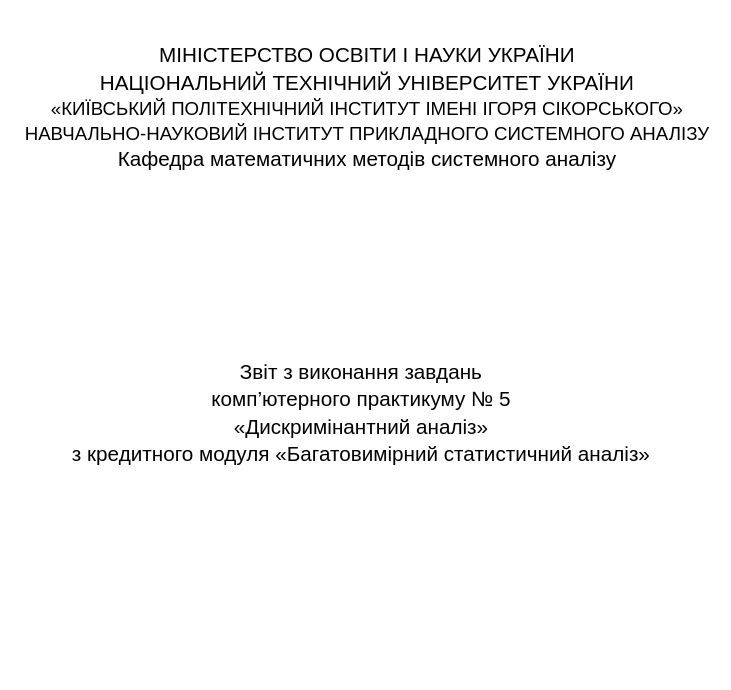

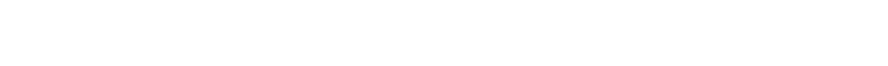

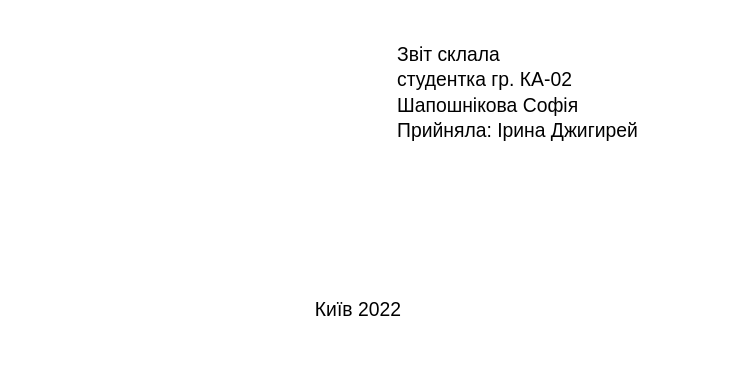

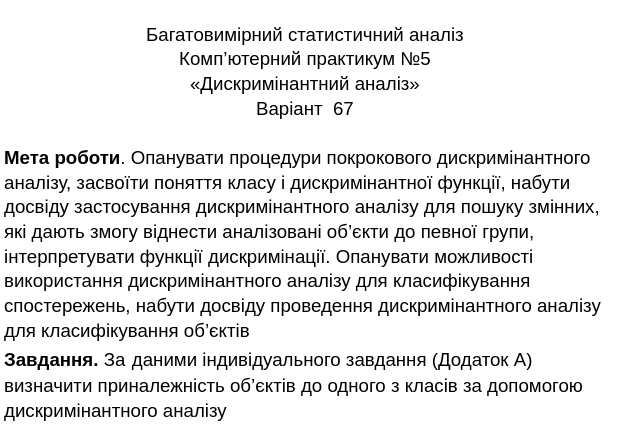

Підключимо небхідні бібліотеки:

In [1]:
# Підключимо бібліотеки для роботи з математичними обчисленнями та масивами даних
import numpy as np
import scipy as sci
# Підключимо бібліотеку для роботи з табличними даними
import pandas as pd
# Підключимо бібліотеки для побудови графіків
import seaborn as sns
import matplotlib.pyplot as plt
# Підключимо функціонал для обчислення всіх можливих комбінацій масиву
from itertools import combinations
# Підключимо функціонал для обчислень
from scipy.spatial import distance
from scipy.cluster.vq import kmeans2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Завдання 1.
Створити таблицю даних, яка міститиме перших 12 об’єктів

Отримаємо набір даних:

In [2]:
x1 = [318.34, 347.49, 259.93, 259.82, 235.73, 193.82, 946.22, 197.67, 154.77, 124.63, 175.23, 221.98, 195.14,  163.68,178.97, 254.76, 169.29, 212.08]
x2 = [95.04,43.56,69.63,90.42,63.58,50.82,224.07,26.95,43.34,22.66,52.36,30.8 ,65.67, 69.08, 85.8, 90.2, 75.02, 106.48]
x3 = [352.66,281.16,330.55,326.59,303.27,270.82,678.59,312.51,284.46,239.03,341.55,285.12 ,309.87,283.58,329.01,416.13,454.08,305.69]
x4 = [25.19,23.76,19.69,17.82,17.49,17.27,55.99,15.51,13.42,9.24,14.41,16.83 ,14.19,14.52,14.52,17.82,12.21,20.02]
x5 = [1,1,1,1,1,1,1,0,0,0,0,0,np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
df = pd.DataFrame({'x1' : x1, 'x2': x2, 'x3' : x3, 'x4' : x4, 'x5' : x5})

Розділимо набір даних:

In [3]:
train_df = df.iloc[:12]
test_df = df.iloc[12:]

In [4]:
test_df = test_df.drop(columns=["x5"])

In [5]:
train_df

,x1,x2,x3,x4,x5
0,318.34,95.04,352.66,25.19,1.0
1,347.49,43.56,281.16,23.76,1.0
2,259.93,69.63,330.55,19.69,1.0
3,259.82,90.42,326.59,17.82,1.0
4,235.73,63.58,303.27,17.49,1.0
5,193.82,50.82,270.82,17.27,1.0
6,946.22,224.07,678.59,55.99,1.0
7,197.67,26.95,312.51,15.51,0.0
8,154.77,43.34,284.46,13.42,0.0
9,124.63,22.66,239.03,9.24,0.0


In [6]:
test_df

,x1,x2,x3,x4
12,195.14,65.67,309.87,14.19
13,163.68,69.08,283.58,14.52
14,178.97,85.80,329.01,14.52
15,254.76,90.20,416.13,17.82
16,169.29,75.02,454.08,12.21
17,212.08,106.48,305.69,20.02


### Завдання 2.
 - Зробити висновки щодо отриманої статистики для змінних «в моделі» на основі значень основних параметрів (кількість змінних «в моделі», значення Λ(статистика лямбда Уілкса), наближене значення статистики F-критерію та розрахований для нього рівень значимості),
 - Зробити висновки щодо  звітної таблиці аналізу дискримінувальних функцій (summary of variables in the model)

In [7]:
from statsmodels.multivariate.manova import MANOVA

In [8]:
maov = MANOVA.from_formula('x1 + x2 + x3 + x4 ~ x5', data=train_df)
print(maov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept         Value  Num DF Den DF F Value  Pr > F
-------------------------------------------------------------
          Wilks' lambda  0.0144 4.0000 7.0000 119.6110 0.0000
         Pillai's trace  0.9856 4.0000 7.0000 119.6110 0.0000
 Hotelling-Lawley trace 68.3492 4.0000 7.0000 119.6110 0.0000
    Roy's greatest root 68.3492 4.0000 7.0000 119.6110 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
             x5           Value  Num DF Den DF F Value Pr > F
-------------------------------------------------------------
            Wilks' lambda 0.2039 4.0000 7.0000  6.8339 0.0145
           Pillai's trace 0.7961 4.0000 7.0000  6.8339 0.0145
   Hotelling-Lawley trace 

Як бачимо, Wilks' lambda = 0.2039, к-ть змінних в моделі = 4, F = 6.8339, p > 0.0145

Робимо висновок, що якість моделі доволі висока

### Завдання 3.
Визначити квадратичну відстань Маланобіса між групами

In [21]:
centr, _ = kmeans2(train_df.iloc[:,:4], 2, minit='points')

In [22]:
centr

array([[226.31,  53.56, 302.52,  17.33],
       [946.22, 224.07, 678.59,  55.99]])

In [25]:
mah = distance.mahalanobis(centr[0], centr[1], np.linalg.inv(np.cov(centr.T)))

Отримали матрицю квадратичних відстаней Маланобіса між групами

In [26]:
np.array([[0, mah**2],[mah**2, 0]])

array([[0.        , 5.98145508],
       [5.98145508, 0.        ]])

Отримаємо p-value для нашої відстані Маланобіса

In [27]:
from scipy.stats import chi2

p = 1 - chi2.cdf(mah**2, 2)
print(p)

0.05025086395469469


### Завдання 4.
Отримати Classification matrix з інформацією про кількість об’єктів у кожній групі на основі апостеріорної класифікації

Отримати результати апостеріорної класифікації кожного об’єкту

Визначити апостеріорні ймовірності приналежності об’єктів 1‒12 до певного класу

In [28]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.T)
    inv_covmat = sci.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [29]:
class MahalanobisBinaryClassifier():
    def __init__(self, xtrain, ytrain):
        self.xtrain_pos = xtrain.loc[ytrain == 1, :]
        self.xtrain_neg = xtrain.loc[ytrain == 0, :]

    def predict_proba(self, xtest):
        pos_neg_dists = [(p,n) for p, n in zip(mahalanobis(xtest, self.xtrain_pos), mahalanobis(xtest, self.xtrain_neg))]
        return np.array([(1-n/(p+n), 1-p/(p+n)) for p,n in pos_neg_dists])

    def predict(self, xtest):
        return np.array([np.argmax(row) for row in self.predict_proba(xtest)])
    
    def show_dist(self, xtest):
        return [(p,n) for p, n in zip(mahalanobis(xtest, self.xtrain_pos), mahalanobis(xtest, self.xtrain_neg))]


In [30]:
clf = MahalanobisBinaryClassifier(train_df.iloc[:,:4], np.array(train_df.iloc[:,4]))

In [34]:
pred_probs = clf.predict_proba(train_df.iloc[:,:4])
pred_class = clf.predict(train_df.iloc[:,:4])

In [35]:
pred_actuals = pd.DataFrame([(pred, act) for pred, act in zip(pred_class, train_df.iloc[:,4])], columns=['pred', 'true'])
print(pred_actuals)

    pred  true
0      1   1.0
1      1   1.0
2      1   1.0
3      1   1.0
4      1   1.0
5      1   1.0
6      1   1.0
7      0   0.0
8      0   0.0
9      0   0.0
10     0   0.0
11     0   0.0


Отримаємо Classification matrix з інформацією про кількість об’єктів у кожній групі:

In [36]:
print(confusion_matrix(pred_class, train_df.iloc[:,4]))

[[5 0]
 [0 7]]


Як бачимо, всі об'єкти було класифіковано правильно: 5 об'єктів належать до першої групи, 7 - до другої

Оцінимо точність класифікації за метриками: precision, recall, f1-score, accuracy - бачимо, що точність класифікації - 100%

In [37]:
print(classification_report(pred_class, train_df.iloc[:,4]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



Виведемо результати апостеріорної класифікації кожного об’єкту ("predict"), а також апостеріорні ймовірності приналежності до кожного з класів: 0 та 1 ("predict_proba_0" та "predict_proba_1" відповідно)

In [38]:
train_df['predict'] = pred_class
train_df[['predict_proba_0','predict_proba_1']] = pred_probs

In [39]:
train_df

,x1,x2,x3,x4,x5,predict,predict_proba_0,predict_proba_1
0,318.34,95.04,352.66,25.19,1.0,1,0.035866,0.964134
1,347.49,43.56,281.16,23.76,1.0,1,0.046812,0.953188
2,259.93,69.63,330.55,19.69,1.0,1,0.063317,0.936683
3,259.82,90.42,326.59,17.82,1.0,1,0.024716,0.975284
4,235.73,63.58,303.27,17.49,1.0,1,0.023516,0.976484
5,193.82,50.82,270.82,17.27,1.0,1,0.048028,0.951972
6,946.22,224.07,678.59,55.99,1.0,1,0.001342,0.998658
7,197.67,26.95,312.51,15.51,0.0,0,0.939247,0.060753
8,154.77,43.34,284.46,13.42,0.0,0,0.760359,0.239641
9,124.63,22.66,239.03,9.24,0.0,0,0.799711,0.200289


### Завдання 5.

Визначити відстані від об’єктів 1‒12 до центрів груп


In [40]:
dists = clf.show_dist(train_df.iloc[:,:4])

In [41]:
pred_actuals[["Gr1", "Gr0"]] = dists
pred_actuals

,pred,true,Gr1,Gr0
0,1,1.0,3.955579,106.331283
1,1,1.0,4.870303,99.170036
2,1,1.0,3.296241,48.762897
3,1,1.0,4.663664,184.029107
4,1,1.0,1.139079,47.299262
5,1,1.0,1.049852,20.809359
6,1,1.0,5.025281,3739.013574
7,0,0.0,49.472417,3.200000
8,0,0.0,10.153325,3.200000
9,0,0.0,12.776889,3.200000


Бачимо, що відстані об'єктів класу G1 ближчі до свого центру і аналогічно з класом G0

### Завдання 6-7.
Для кожного з об’єктів 13-18 визначити значення показників класифікації,
на основі яких зробити висновок щодо приналежності об’єктів до одного з
класів. Хід аналізу повинен містити таблицю значень показників класифікації та приналежності об’єктів
до класів.

In [42]:
pred_probs = clf.predict_proba(test_df)
pred_class = clf.predict(test_df)

In [43]:
dists = clf.show_dist(test_df)

In [44]:
pred_actuals = pd.DataFrame([(pred, pr0, pr1, d0, d1) for pred, pr0, pr1, d0, d1 in zip(pred_class,pred_probs[:,0], pred_probs[:,1], np.array(dists)[:,1], np.array(dists)[:,0])], 
                            columns=['pred', 'prob_G0', 'prob_G1', 'dist_G0', 'dist_G1'])
print(pred_actuals)

   pred   prob_G0   prob_G1     dist_G0     dist_G1
0     1  0.113695  0.886305   49.465514    6.345451
1     1  0.087098  0.912902   22.411629    2.138245
2     1  0.089095  0.910905   53.455070    5.228429
3     1  0.269636  0.730364  135.448336   50.004760
4     0  0.692883  0.307117   86.780333  195.784148
5     1  0.236797  0.763203   96.924606   30.072476


### Висновки


Під час виконання роботи було проведено дискримінантний аналіз з визначенням основних параметрів (кількість змінних «в моделі», значення Λ(статистика лямбда Уілкса), наближене значення статистики F-критерію та розрахований для нього рівень значимості), побудовано класифікатор з допомогою відстані Маланобіса та визначено класифікувальні функції для кожного класу. Зроблено висновки про приналежність нових об'єктів до певного класу